<a href="https://colab.research.google.com/github/IA-DAMA/MIT-DeepLearning/blob/main/Part1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright Information


Licensed under the MIT License. You may not use this file except in compliance
with the License. Use and/or modification of this code outside of MIT.

Introduction to Deep Learning must reference:



© MIT Introduction to Deep Learning

http://introtodeeplearning.com

# Laboratory 2: Computer Vision

# Part 1: MNIST Digit Classification

*Building and training  CNN for classification of handwriting digits from MNIST dataset which consists of 60,000 training images and 10,000 test images: Classes are digits 0-9.*

*Downloading the course repository and installing dependencies on the cell bellow:*

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check if GPUs are available
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPUs are available!")
else:
    print("No GPUs are available. Switching to CPU.")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117302 sha256=7d5379ba282ea008ec3b3d49d278fa1bc8bd79ca2d052047196a81927b7060ed
  Stored in directory: /root/.cache/pip/wheels/9c/9f/b5/0e31f83bc60a83625e37429f923934e26802d0d68cf3ef3216
Successfully built mitdeeplearning
GPUs are available!


# 1.1 MNIST dataset

*Download and load the dataset and display random samples from it:*

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11490434/11490434 [==============================] - 2s 0us/step


*The training set is made up of 28x28 grayscale images.*

*Visualizing these images and their corresponding training labels and do they look like:*

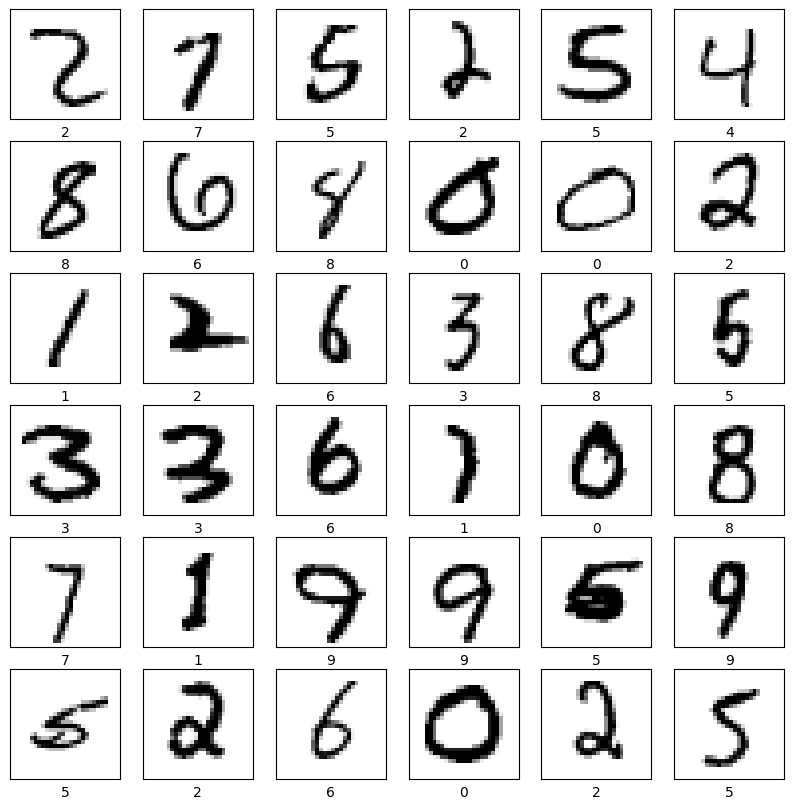

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000, 36) # It will generate 36 samples from 60 thousand images
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

# 1.2 Neural Network for Handwritten Digit Classification

*First building a simple neuralnetwork with two fully connected layers and apply it to the digits classification. The output is a `probability distribution` over 10 digits classes (0-9). Such structure can be visualized down bellow:*





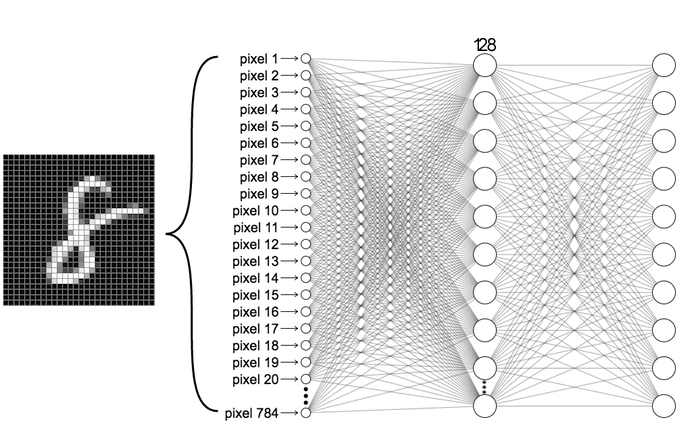

*To define such architecture, use Keras API and define the model using the `Sequential` class. First, we'll use a `Flatten`layer, so that the input can be fed into the model.*

In [4]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten Layer
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')  # num_classes = 10(0-9)
  ])
  return fc_model

model = build_fc_model()

**Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model.**

*The network right above consists of a sequence of two `tf.keras.layers.Dense`layers and they're fully connected neural layers.*



*1.*   *First layers consists of 128 nodes*

*2.*   *Second layer consists of the number of classes defined*



# Compile the model

**Defining a few more settings by adding the following parameters:**



*   `Loss function` - *It defines how can we measure how accurate the model is during training*
*   `Optimizer` -  *It defines how the model is updated based on the data it sees and its `loss function`*
*   `Metrics` -  *It defines the metrics which will monitor the training and the testing steps by looking at the `Accuracy`*


In [5]:
# You can experiment with different optimizers and learning rates here
# For example, let's use Adam optimizer with a learning rate of 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

By feeding the model with the training data (`train_images` and `train_labels`)

In [6]:
model.fit(train_images, train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 8s 3ms/step - loss: 0.2964 - accuracy: 0.9177
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1328 - accuracy: 0.9608
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0932 - accuracy: 0.9729
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0716 - accuracy: 0.9791
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0561 - accuracy: 0.9831


# Evaluate accuracy on the test dataset

*Let's check if model's predictions match the labels from the `test_labels` array. The `Evaluate method` will evaluate our model on the test dataset.*

*The evaluation method is built as the following prompt line down bellow:*

*model.evaluate(test_images, test_labels, verbose=2)*


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0844 - accuracy: 0.9742 - 665ms/epoch - 2ms/step
Test accuracy: 0.9742000102996826


*As we may notice, test accuracy is lower than the model's accuracy due to an issue we call `Overfitting`*

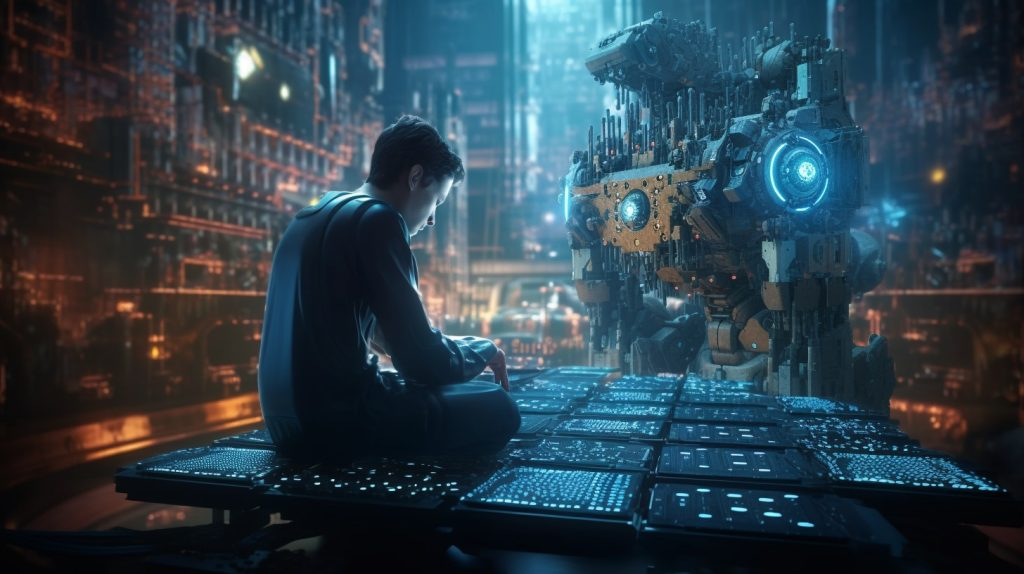

# 1.3 Convolutional Neural Network (CNN) for handwritten digit classification

*The CNN we will be building is depicted below for now:*


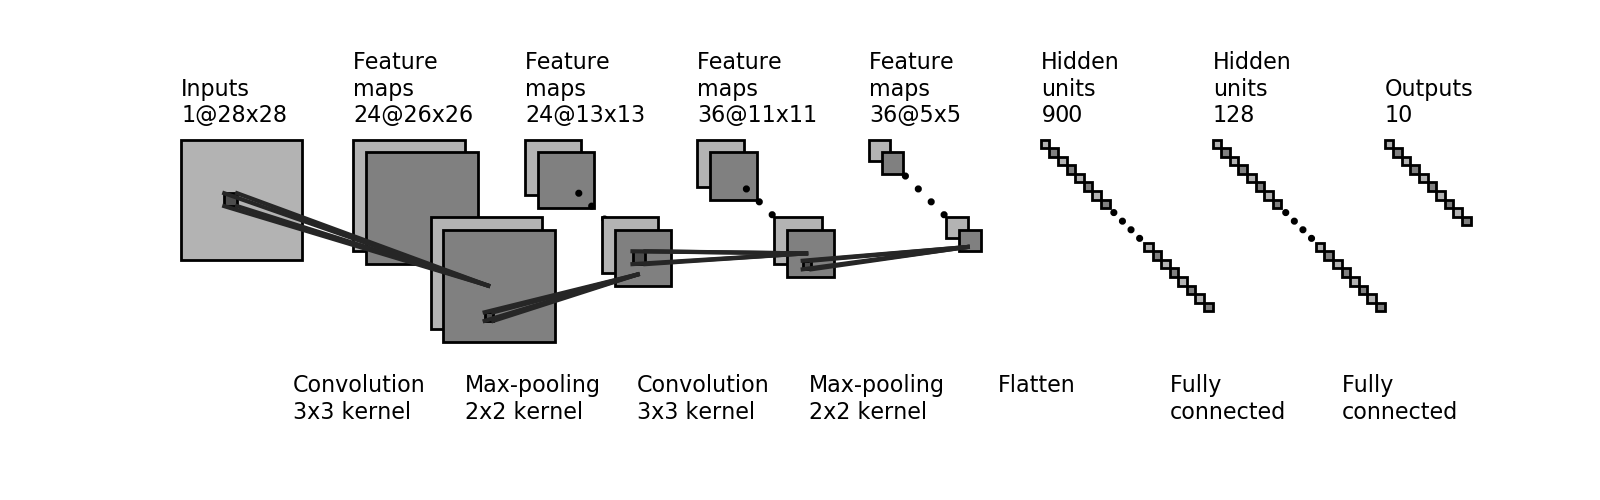


# Define the CNN model

*Using the same training and test datasets as before and proceed and train the following new CNN model. Thus, we'll be using `Keras.layers.Conv2D` to define convolutional layers and `Keras.layers.MaxPool2D` to define the pooling layers.*

*Hence, we'll be using the parameters from the image above.*

In [8]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
# First convolutional layer with 24 feature maps, 3x3 kernel, and ReLU activation
        tf.keras.layers.Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

# First max pooling layer with 2x2 kernel
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

# Second convolutional layer with 36 feature maps, 3x3 kernel, and ReLU activation
        tf.keras.layers.Conv2D(36, kernel_size=(3, 3), activation='relu'),

# Second max pooling layer with 2x2 kernel
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

# Flatten layer to transform data for the fully connected layers
        tf.keras.layers.Flatten(),

# First fully connected layer with 900 units and ReLU activation
        tf.keras.layers.Dense(900, activation='relu'),

# Second fully connected layer with 128 units and ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),

# Output layer with 10 units (for 10 classes) and softmax activation
        tf.keras.layers.Dense(10, activation='softmax')

    ])

    return cnn_model

cnn_model = build_cnn_model()

# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])

# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 3s 3s/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 den

# Train and test the CNN model

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

*Training CNN using the `fit method` via Keras API*

In [10]:
cnn_model.fit(train_images, train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 8s 4ms/step - loss: 0.1408 - accuracy: 0.9566
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0435 - accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0175 - accuracy: 0.9942


# Evaluating the method:

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0844 - accuracy: 0.9742 - 650ms/epoch - 2ms/step
Test accuracy: 0.9742000102996826


# Make predictions with the CNN model

*Now the model is trained we might be able to make predictions by using the `Predict function`*

In [21]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


*With this function call, the model predicts the label for each image in the testing set. Let's take a look at the prediction for the first image in the test dataset:*

In [13]:
#predictions[0] # It will predict an array of 10 numbers

array([3.06134496e-08, 7.98658584e-06, 9.46641762e-07, 1.46986247e-06,
       1.00668685e-05, 6.60533544e-07, 1.10047149e-09, 9.99967575e-01,
       1.20340630e-07, 1.11387890e-05], dtype=float32)

*So now we'll be taking a look at the digit that has the highest confidence for the first image.*

In [22]:
#prediction = predictions[0]

#print(prediction)
prediction = np.argmax(predictions[0])

print("Predicted digit:", prediction)

Predicted digit: 7


*Now we may check the test label to see whether the prediction is correct or not.*

Label of this digit is: 7


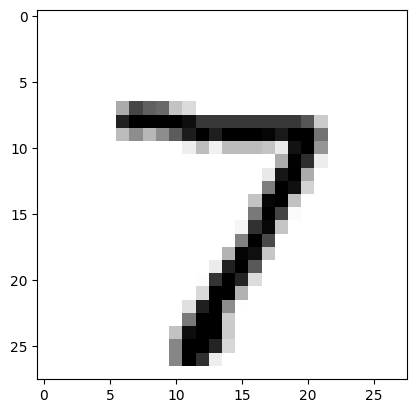

In [27]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0, :, :, 0], cmap=plt.cm.binary)
plt.show()

*Now we may be able to plot images with their predicted label as well as a histogram that provides prediction probabilities for each of the digits*

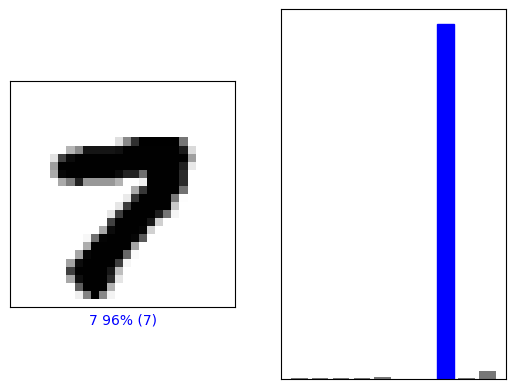

In [28]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

# Assuming the following functions are available
# mdl.lab2.plot_image_prediction(index, predictions, true_labels, images)
# mdl.lab2.plot_value_prediction(index, predictions, true_labels)

# Choose an image index to visualize
image_index = 79  #@param {type:"slider", min:0, max:100, step:1}

# Visualize the prediction and true label for the chosen image

plt.subplot(1, 2, 1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)
plt.show()

*We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are grey.*

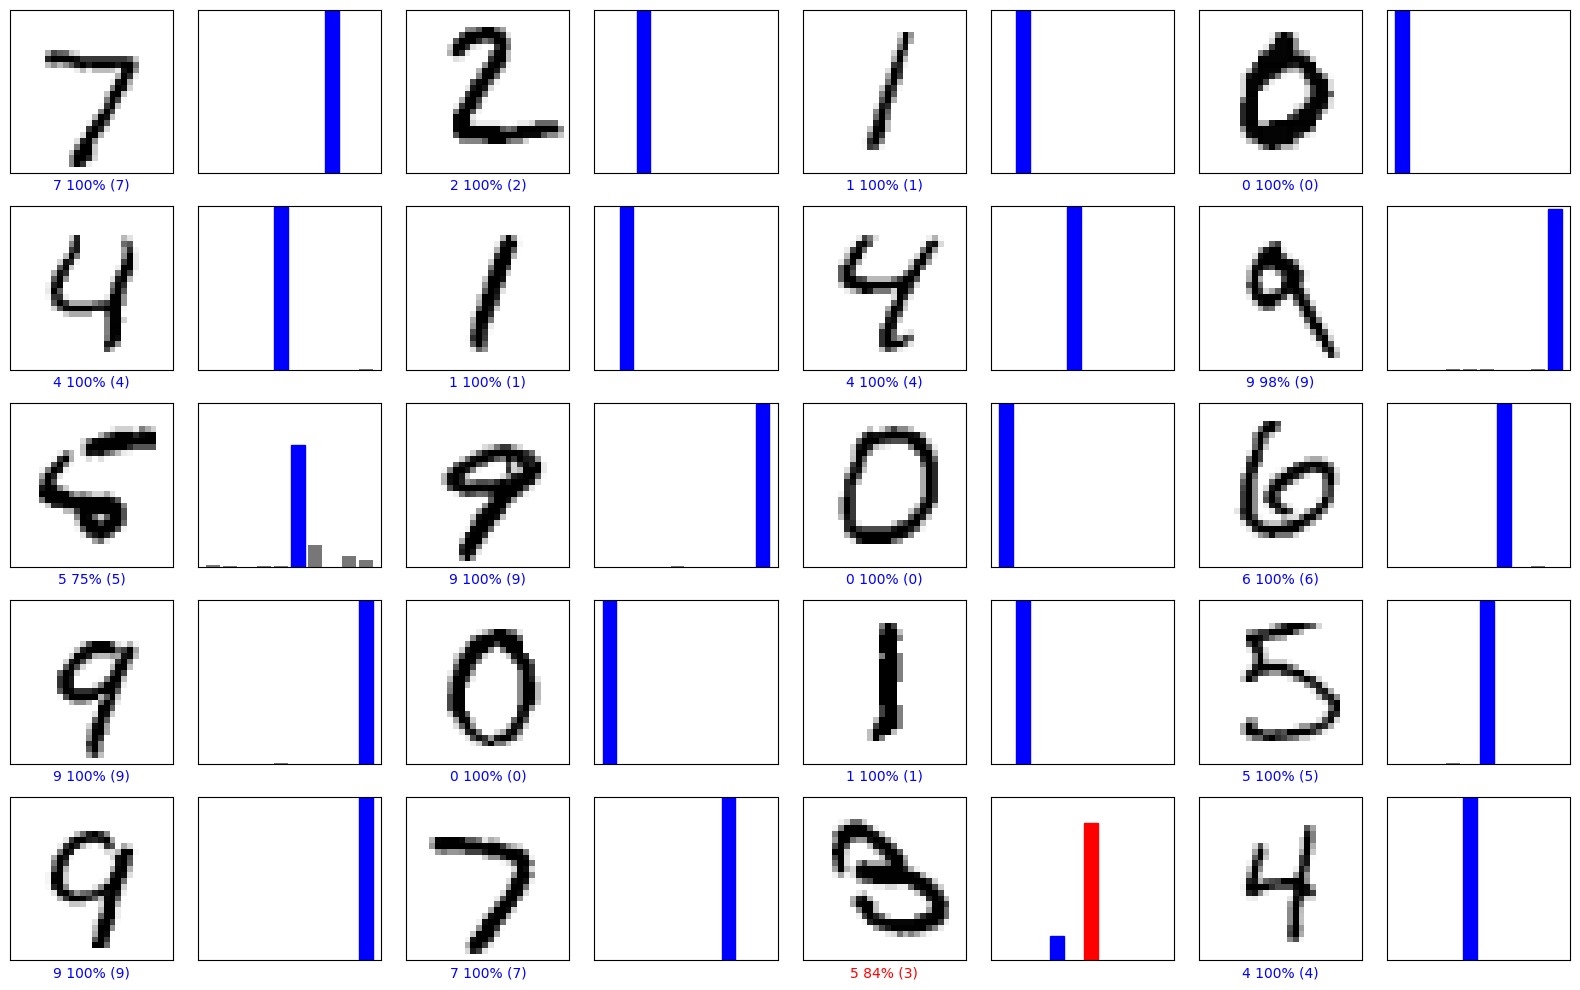

In [30]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    mdl.lab2.plot_value_prediction(i, predictions, test_labels)
plt.tight_layout()
plt.show()

# 1.4 Training the model 2.0

*Earlier in the lab, we used the `fit function` call to train the model. This function is quite high-level and intuitive, which is really useful for simpler models. As you may be able to tell, this function abstracts away many details in the training call, and we have less control over training model, which could be useful in other contexts.*

*As an alternative to this, you should try the `tf.GradientTape` class in **MIT** to record differentiation operations during training, and then call the `tf.GradientTape.gradient function` to actually compute the gradients. Let's take another look at this here, but you may recall seeing this in Lab 1 Part 1 from the following links:*

MIT: https://github.com/aamini/introtodeeplearning/blob/master/lab2/Part1_MNIST.ipynb

DAMA: https://github.com/IA-DAMA/MIT-DeepLearning/blob/main/Part1_TensorFlow_MIT_Exercises.ipynb



*We'll use this framework to train our cnn_model using stochastic gradient descent.*


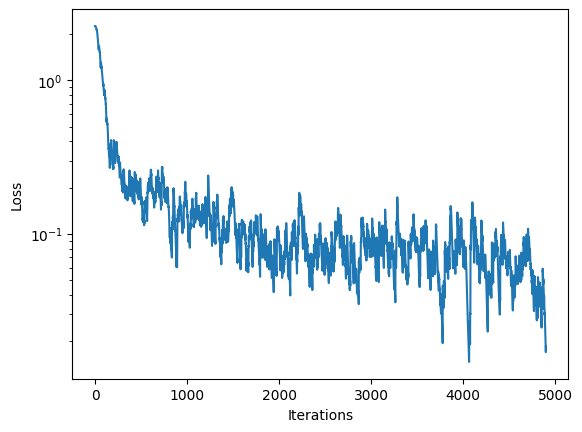

100%|██████████| 5000/5000 [01:45<00:00, 47.22it/s]


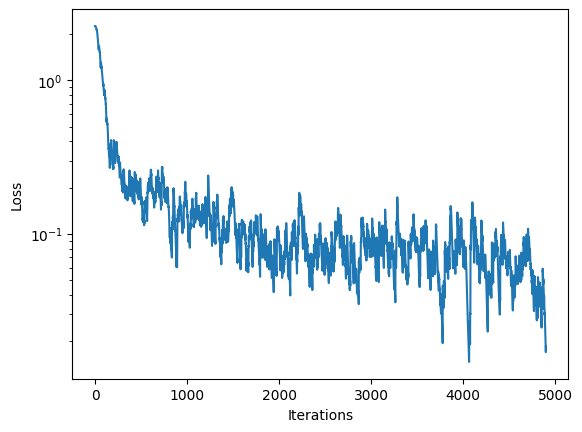

In [31]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)  # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)  # define our optimizer

if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()  # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
    # First grab a batch of training data and convert the input images to tensors
    (images, labels) = (train_images[idx:idx + batch_size], train_labels[idx:idx + batch_size])
    images = tf.convert_to_tensor(images, dtype=tf.float32)

    # GradientTape to record differentiation operations
    with tf.GradientTape() as tape:
        # Feed the images into the model and obtain the predictions
        logits = cnn_model(images)

        # Compute the categorical cross entropy loss
        loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

    loss_history.append(loss_value.numpy().mean())  # append the loss to the loss_history record
    plotter.plot(loss_history.get())

    # Backpropagation
    # Use the tape to compute the gradient against all parameters in the CNN model.
    # Use cnn_model.trainable_variables to access these parameters.
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))


# 1.5 MIT's Conclusion on this Code/Lab

*In this part of the lab, you had the chance to play with different MNIST classifiers with different architectures (fully-connected layers only, CNN), and experiment with how different hyperparameters affect accuracy (learning rate, etc.). The next part of the lab explores another application of CNNs, facial detection, and some drawbacks of AI systems in real world applications, like issues of bias.*


# Finally, here lays how did I get to solve the lab delivered the MIT

Mit's lab may be found at https://github.com/aamini/introtodeeplearning/blob/master/lab2/Part1_MNIST.ipynb

DAMA's lab may be found at https://github.com/IA-DAMA/MIT-DeepLearning/tree/main

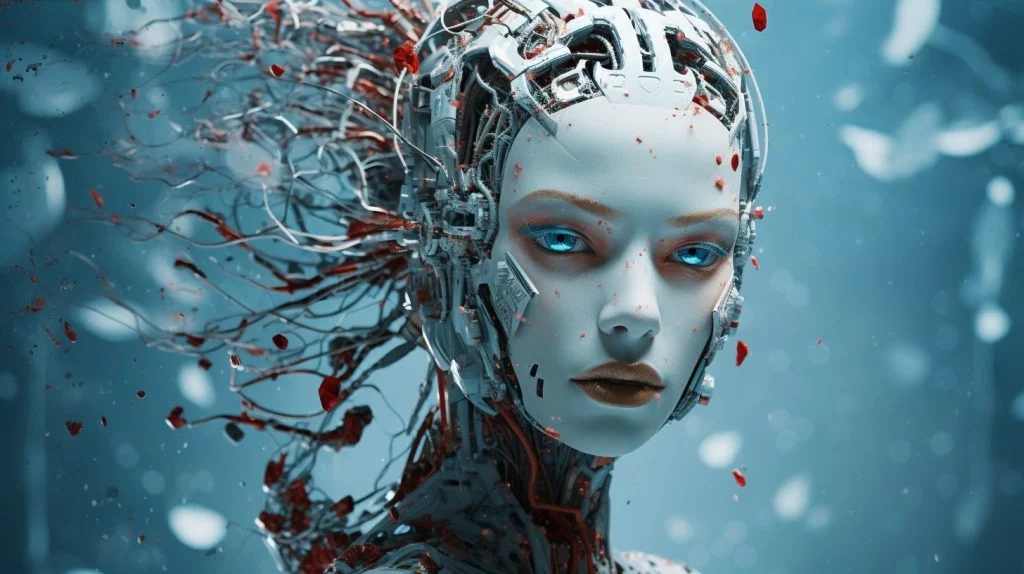